In [6]:
from read_data import *
from hyper import *
from alignment import *
from datasets.preprecossing import *

In [65]:
xy = np.load("./datas/data1/dataxy.npy")
xy

array([[-0.11409958, -0.24212337],
       [-0.03599507, -0.2652297 ],
       [-0.12553681, -0.23639578],
       [-0.26744756, -0.01068836],
       [-0.26759762, -0.00582709],
       [-0.06144055, -0.26051393],
       [ 0.2576    ,  0.07269584],
       [-0.26670626, -0.02258787],
       [-0.26512063, -0.03678991],
       [-0.09766793, -0.24920557],
       [-0.26507813, -0.03709492],
       [-0.25767484, -0.07243013],
       [-0.2658247 , -0.03129955],
       [-0.2613692 , -0.05769393],
       [ 0.25014707, -0.09523062],
       [ 0.09024642,  0.25198814],
       [ 0.25285673, -0.08778335],
       [ 0.10810529,  0.2448585 ],
       [ 0.09945133,  0.24849924],
       [ 0.12186459,  0.23830962],
       [ 0.23696478, -0.12445939],
       [ 0.21241039,  0.16286275],
       [ 0.07767078,  0.2561439 ],
       [ 0.26758653, -0.00631578],
       [ 0.2597393 ,  0.06463702],
       [ 0.25046033, -0.09440376],
       [-0.2651052 , -0.036899  ],
       [ 0.25029337, -0.09484439],
       [-0.26752084,

In [70]:
xy[:,0]

array([-0.11409958, -0.03599507, -0.12553681, -0.26744756, -0.26759762,
       -0.06144055,  0.2576    , -0.26670626, -0.26512063, -0.09766793,
       -0.26507813, -0.25767484, -0.2658247 , -0.2613692 ,  0.25014707,
        0.09024642,  0.25285673,  0.10810529,  0.09945133,  0.12186459,
        0.23696478,  0.21241039,  0.07767078,  0.26758653,  0.2597393 ,
        0.25046033, -0.2651052 ,  0.25029337, -0.26752084, -0.26546103,
        0.25156832,  0.25866666, -0.26603696,  0.10377133,  0.09771232,
       -0.26669225, -0.11981203,  0.08910905, -0.25950706,  0.10353811,
       -0.10949122, -0.26306376, -0.04870643,  0.24426058, -0.0790217 ,
        0.26271045,  0.25268325,  0.23304598,  0.1811213 , -0.16691624,
        0.00764478], dtype=float32)

In [82]:
from scipy.spatial import distance_matrix
dd=distance_matrix(xy,xy)
dd

array([[0.        , 0.08145071, 0.01279123, ..., 0.46935588, 0.11056057,
        0.26216768],
       [0.08145071, 0.        , 0.09406975, ..., 0.4446068 , 0.17775512,
        0.25899511],
       [0.01279123, 0.09406975, 0.        , ..., 0.4722624 , 0.10033181,
        0.26271775],
       ...,
       [0.46935588, 0.4446068 , 0.4722624 , ..., 0.        , 0.43911537,
        0.21840939],
       [0.11056057, 0.17775512, 0.10033181, ..., 0.43911537, 0.        ,
        0.22070765],
       [0.26216768, 0.25899511, 0.26271775, ..., 0.21840939, 0.22070765,
        0.        ]])

In [83]:
dd[15][33] good

0.014531121469451885

In [92]:
np.linalg.norm(nodes1[15].value-nodes1[33].value)

3.3449689575129886

In [84]:
dd[16][27] bad

0.007511924407045457

In [93]:
np.linalg.norm(nodes1[16].value-nodes1[27].value)

5.91302270649453

In [85]:
dd[23][31] good

0.07550328800208173

In [94]:
np.linalg.norm(nodes1[23].value-nodes1[31].value)

4.736285876071351

In [86]:
dd[12][26] bad

0.005645492980613752

In [95]:
np.linalg.norm(nodes1[12].value-nodes1[26].value)

7.010396359558664

In [87]:
dd[9][36] good

0.02427929985126775

In [96]:
np.linalg.norm(nodes1[9].value-nodes1[36].value)

2.977697700113567

In [88]:
folder_path1='./datas/data1/'
folder_path2="./datas/data2/"
pos_1 = pd.read_csv(folder_path1+"datas.csv",index_col="Unnamed: 0").sort_index().values
pos_2 = pd.read_csv(folder_path2+"datas.csv",index_col="Unnamed: 0").sort_index().values
edge_1 = np.load(folder_path1+"datalink.npy");
edge_2 = np.load(folder_path2+"datalink.npy");
mer1 = np.load(folder_path1+"datamerge.npy");
mer2 = np.load(folder_path2+"datamerge.npy");

n1 = len(pos_1)
n2 = len(pos_2)

root1 = -1;
for i,j in edge_1:
    root1 = max(root1,i);
length1 = root1 + 1;

root2 = -1;
for i,j in edge_2:
    root2 = max(root2,i);
length2 = root2 + 1;

nodes1 = [node(name=str(i),son=[]) for i in range(length1)]
nodes2 = [node(name=str(i),son=[]) for i in range(length2)]
for i,j in edge_1:
    nodes1[i].son.append(nodes1[j])
for i,j in edge_2:
    nodes2[i].son.append(nodes2[j])
for i in range(len(pos_1)):
    nodes1[i].value = pos_1[i];
    nodes1[i].subson = [nodes1[i].name];
for i in range(len(pos_2)):
    nodes2[i].value = pos_2[i];
    nodes2[i].subson = [nodes2[i].name]

    
for i in range(len(pos_1),length1):
    if(mer1[i]!= -1):
        nodes1[i].value = nodes1[mer1[i]].value
        nodes1[i].name = nodes1[mer1[i]].name+'(t)'
        nodes1[i].subson  = nodes1[mer1[i]].subson;
    else:
        for son in nodes1[i].son:
            nodes1[i].subson.extend(son.subson);
    
for i in range(len(pos_2),length2):
    if(mer2[i]!= -1):
        nodes2[i].value = nodes2[mer2[i]].value
        nodes2[i].name = nodes2[mer2[i]].name+'(t)'
        nodes2[i].subson = nodes2[mer2[i]].subson
    else:
        for son in nodes2[i].son:
            nodes2[i].subson.extend(son.subson);

            
adata1 = pd.read_csv(folder_path1+"data_cell.csv")
type1 = pd.read_csv(folder_path1+"data_type.csv")[['Unnamed: 0','leiden']]
datas1 = type1.merge(adata1,how="inner",on="Unnamed: 0")
datas1 = datas1.set_index("Unnamed: 0")
        
adata2 = pd.read_csv(folder_path2+"data_cell.csv")
type2 = pd.read_csv(folder_path2+"data_type.csv")[['Unnamed: 0','leiden']]
datas2 = type2.merge(adata2,how="inner",on="Unnamed: 0")
datas2 = datas2.set_index("Unnamed: 0")
        
for i in range(len(pos_1),length1):
    if(mer1[i]!=-1):
        continue;
    med = []
    for sub in nodes1[i].subson:
        subdata = datas1[datas1['leiden']==int(sub)];
        med.extend(subdata.values[:,1:].tolist());
    med = np.array(med);
    p = pd.DataFrame(med);
    nodes1[i].value = p.mean(axis=0).values;
    
for i in range(len(pos_2),length2):

    if(mer2[i]!=-1):
        continue;
    med = []
    for sub in nodes2[i].subson:
        subdata = datas2[datas2['leiden']==int(sub)];
        med.extend(subdata.values[:,1:].tolist());
    med = np.array(med);
    p = pd.DataFrame(med);
    nodes2[i].value = p.mean(axis=0).values;

In [90]:
np.linalg.norm(nodes1[].value,nodes1[].value)

<module 'numpy' from '/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/numpy/__init__.py'>

In [64]:
show_the_tree("./datas/data1/")

In [62]:
show_the_tree("./datas/data1/")

In [63]:
print(lables)

{0: 'CD8Tcm', 1: 'Malignant', 2: 'CD8Tcm', 3: 'Fibroblasts', 4: 'M1', 5: 'Endothelial', 6: 'B', 7: 'CD8Tex', 8: 'Fibroblasts', 9: 'CD8Tcm', 10: 'CD8Tcm', 11: 'CD8Tex', 12: 'Plasma', 13: 'Myofibroblasts', 14: 'CD8Tcm', 15: 'Malignant', 16: 'Malignant', 17: 'Malignant', 18: 'Malignant', 19: 'CD8Tex', 20: 'Malignant', 21: 'Mast', 22: 'Malignant', 23: 'B', 24: 'Malignant', 25: 'Fibroblasts'}


In [31]:
indexs=[];celltypes=[];lables={}

In [32]:
for i in range(26):
    indexs.append(i);
    lables[i]=adata1.obs[adata1.obs['leiden']==str(i)].groupby('Celltype').count().max(axis=1).idxmax()
    celltypes.append(adata1.obs[adata1.obs['leiden']==str(i)].groupby('Celltype').count().max(axis=1).idxmax())
    # print(i,adata1.obs[adata1.obs['leiden']==str(i)].groupby('Celltype').count().max(axis=1).idxmax())

In [22]:
adata1.obs[adata1.obs['leiden']=='8'].groupby('Celltype').count().max(axis=1).idxmax()

'Fibroblasts'

In [34]:
adata1.obs[adata1.obs['leiden']=='19'].groupby('Celltype').count()

,orig.ident,nCount_RNA,nFeature_RNA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,n_genes,leiden
Celltype,,,,,,,,,,,,,,,
B,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
CD8Tcm,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137
CD8Tex,388,388,388,388,388,388,388,388,388,388,388,388,388,388,388
Endothelial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fibroblasts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
M1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Malignant,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Mast,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Myofibroblasts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
adata1.obs[adata1.obs['leiden']=='10'].groupby('Celltype').count()

,orig.ident,nCount_RNA,nFeature_RNA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,n_genes,leiden
Celltype,,,,,,,,,,,,,,,
B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CD8Tcm,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620
CD8Tex,547,547,547,547,547,547,547,547,547,547,547,547,547,547,547
Endothelial,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Fibroblasts,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
M1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Malignant,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Mast,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Myofibroblasts,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
adata1.obs[adata1.obs['leiden']=='12'].groupby('Celltype').count()

,orig.ident,nCount_RNA,nFeature_RNA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,n_genes,leiden
Celltype,,,,,,,,,,,,,,,
B,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
CD8Tcm,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CD8Tex,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Endothelial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fibroblasts,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
M1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Malignant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mast,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Myofibroblasts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



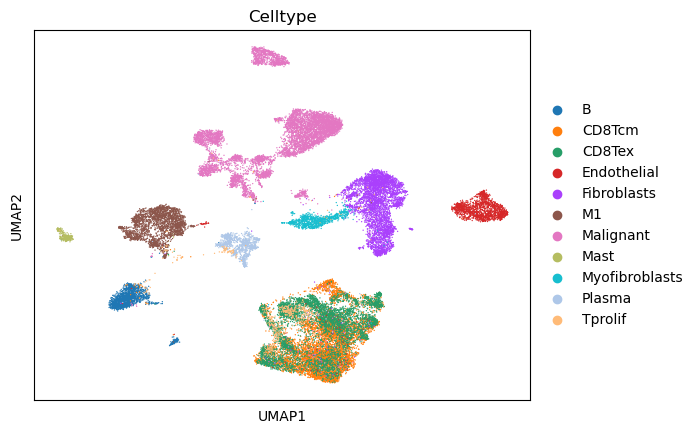

In [35]:
adata1 = sc.read("../../../capital/docs/tutorials/BRCA_EMTAB8107_expression_processed.h5ad")
adata2 = sc.read("../../../capital/docs/tutorials/BRCA_GSE114727_inDrop_expression_processed.h5ad") 
# adata2 = sc.read("../../../capital/docs/tutorials/BRCA_EMTAB8107_expression_processed.h5ad")
cell_type1 = pd.read_csv("../../../capital/docs/tutorials/BRCA_EMTAB8107_CellMetainfo_table.tsv",sep="\t")
cell_type2 = pd.read_csv("../../../capital/docs/tutorials/BRCA_GSE114727_inDrop_CellMetainfo_table.tsv",sep='\t');
adata1.obs.loc[list(cell_type1['Cell']), 'Celltype'] = list(cell_type1['Celltype (minor-lineage)'])
adata2.obs.loc[list(cell_type2['Cell']), 'Celltype'] = list(cell_type2['Celltype (minor-lineage)'])

# preprocessing()
sc.pl.umap(adata1, color="Celltype")

In [ ]:
adata1.obs[adata1.obs['Celltype']=='Malignant'].groupby('leiden').count()

,orig.ident,nCount_RNA,nFeature_RNA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,n_genes,Celltype
leiden,,,,,,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
1,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
7,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
adata1.obs[adata1.obs['Celltype']=='B'].groupby('leiden').count()

,orig.ident,nCount_RNA,nFeature_RNA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,n_genes,Celltype
leiden,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521
7,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



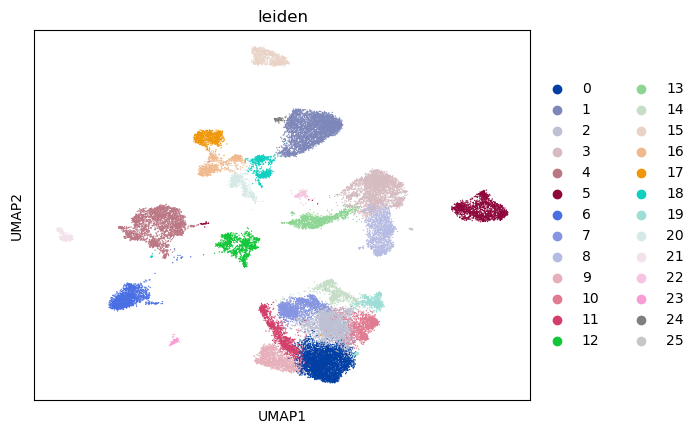

In [ ]:
sc.pl.umap(adata1, color="leiden")

In [36]:
set_initial_condition(adata1)
set_initial_condition(adata2)

In [37]:
adata1.uns.pop("log1p")
adata2.uns.pop("log1p")


{}

In [38]:
gene_list = sort_data(adata1,adata2)


/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/raw.py:139: FutureWarning:

X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/raw.py:139: FutureWarning:

X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.



513 genes are used to calculate cost of tree alignment.



In [39]:
adata1.uns["capital"]["intersection_genes"] = np.array(
    gene_list, dtype=object)
adata2.uns["capital"]["intersection_genes"] = np.array(
    gene_list, dtype=object)

In [40]:
datas1 = calculate_cluster_centroid_for_genes(adata1,gene_list,save_path = "./datas/data1/")
datas2 = calculate_cluster_centroid_for_genes(adata2,gene_list,save_path = "./datas/data2/")

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/raw.py:139: FutureWarning:

X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/raw.py:139: FutureWarning:

X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.



./datas/data1/datas.data length:26
Generating all pairs superset


100%|██████████| 1563/1563 [01:04<00:00, 24.13ex/s, loss=1.377340] 


	 Epoch 9 | average train loss: 1.405255
Optimization finished.


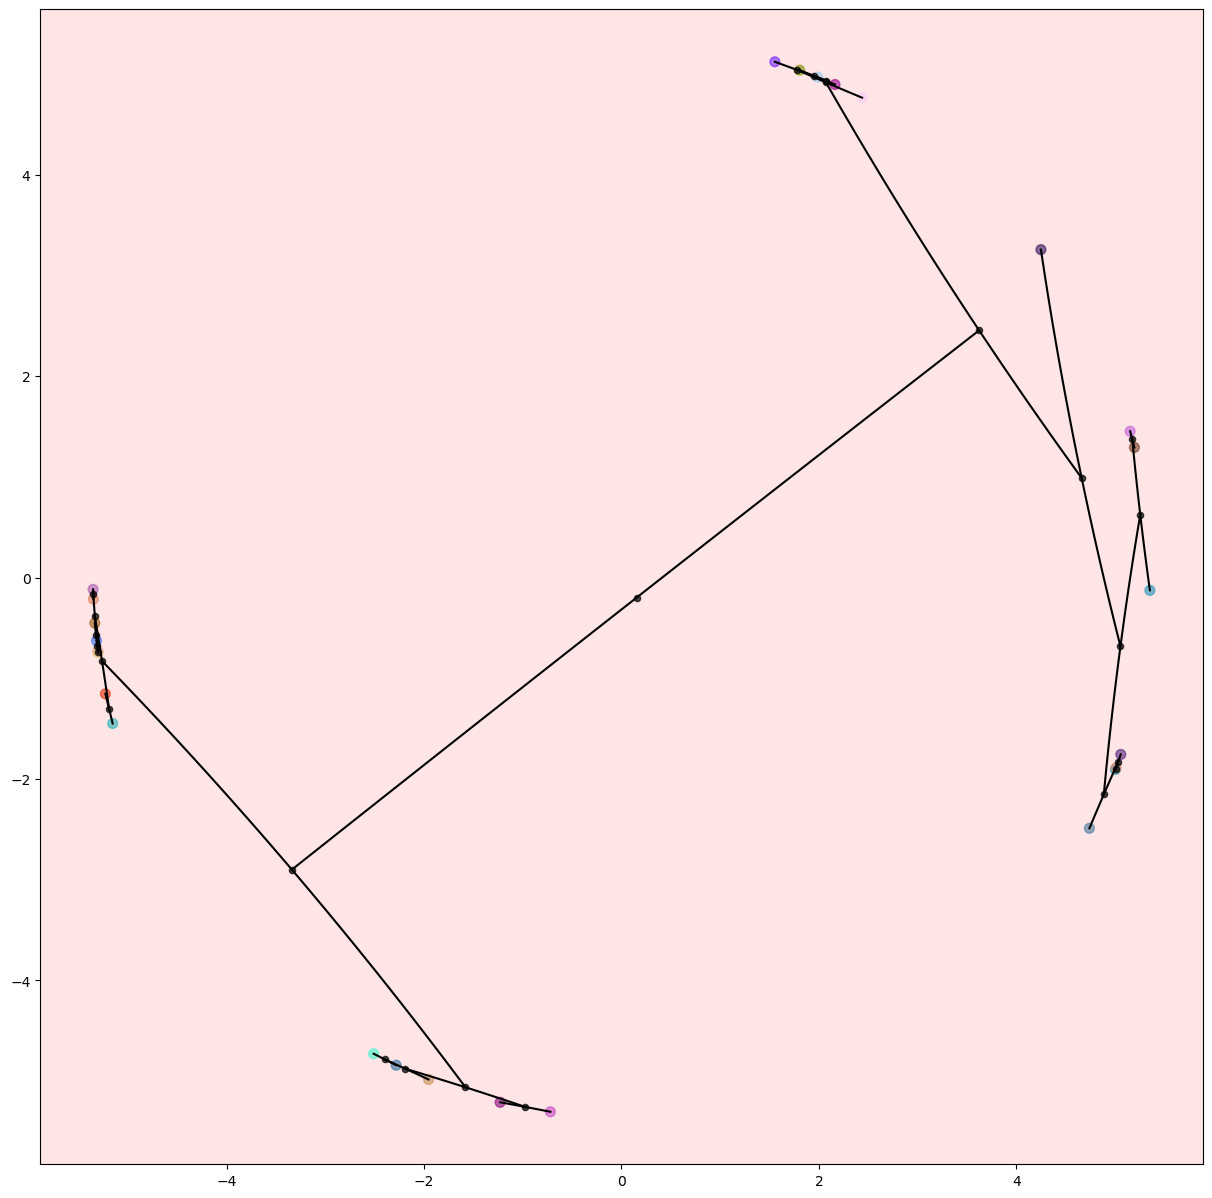

In [61]:
get_Hyper_tree('./datas/data1/datas.data',1,514,0,10,save_path="./datas/data1/",c=-1)

In [44]:
show_the_tree("./datas/data1/")

Generating all pairs superset


100%|██████████| 1563/1563 [01:00<00:00, 25.75ex/s, loss=1.567933] 


	 Epoch 9 | average train loss: 1.593158
Optimization finished.


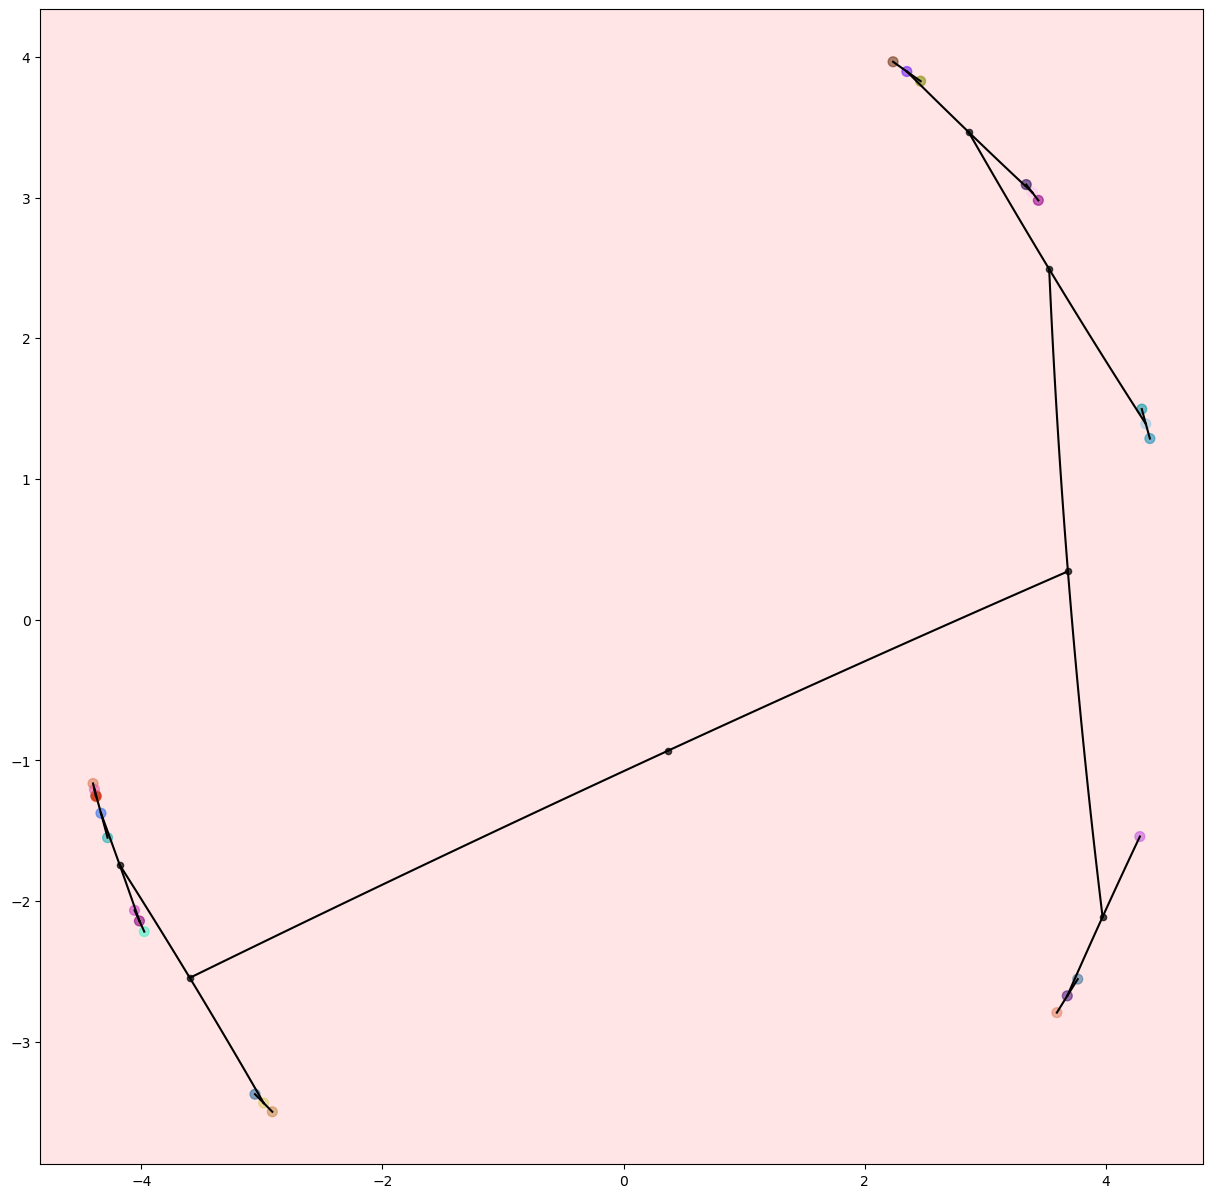

In [19]:
get_Hyper_tree('./datas/data2/datas.data',1,514,0,10,save_path="./datas/data2/")

In [20]:

run_alignment(folder_path1="datas/data1/",folder_path2="datas/data2/")


41
41
0.0
The mininum cost for alignment is 0.0
The alignment edges list is [('41', '41'), ('40', '40'), ('39', '39'), ('38', '38'), ('22(t)', '22(t)'), ('24', '24'), ('15', '15'), ('19(t)', '19(t)'), ('21', '21'), ('17', '17'), ('18(t)', '18(t)'), ('23', '23'), ('14', '14'), ('37', '37'), ('16(t)', '16(t)'), ('25', '25'), ('20', '20'), ('6', '6'), ('36', '36'), ('33', '33'), ('12(t)', '12(t)'), ('8(t)', '8(t)'), ('7(t)', '7(t)'), ('13', '13'), ('4', '4'), ('3', '3'), ('11', '11'), ('5(t)', '5(t)'), ('2', '2'), ('1', '1'), ('10(t)', '10(t)'), ('9', '9'), ('0', '0')]


In [ ]:
model.load_state_dict(best_model)


In [45]:
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)


NameError: name 'dataset' is not defined

In [48]:
x, y_true, similarities = load_data('./datas/data1/datas.data',1,514,0)
# print("{} length:{}".format(data_path,len(y_true)));
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=8, pin_memory=True)

Generating all pairs superset


In [60]:
model = HypHC(similarities.shape[0], 2, 5e-2, 5e-2 ,0.999)
params = torch.load(("./datas/data1/model.pth"), map_location=torch.device('cpu'))
model.load_state_dict(params, strict=False)
model.eval()


AttributeError: 'HypHC' object has no attribute 'copy'